### **Environment Set Up**

In [17]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
sns.set_palette('Set2')
sns.set_style(style = 'darkgrid')
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [18]:
df = pd.read_csv('./datasets/filtered.csv')
df.shape

(339346, 16)

In [19]:
df.columns

Index(['Unnamed: 0', 'CrimeDate', 'CrimeTime', 'CrimeCode', 'Location',
       'Description', 'Inside_Outside', 'Weapon', 'Post', 'District',
       'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'Premise',
       'Total_Incidents'],
      dtype='object')

In [20]:
df.describe()

,Unnamed: 0,Post,Latitude,Longitude,Total_Incidents
count,339346.000000,333940.000000,338774.000000,338774.000000,339346.0
mean,284447.756493,502.898976,38.775024,-75.580036,1.0
std,163494.806862,260.477448,4.542379,8.853893,0.0
min,223.000000,111.000000,0.000000,-76.711196,1.0
25%,142860.250000,234.000000,39.287730,-76.647728,1.0
50%,284990.500000,511.000000,39.302586,-76.613102,1.0
75%,425988.750000,723.000000,39.327238,-76.585301,1.0
max,566277.000000,943.000000,39.371985,0.000000,1.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339346 entries, 0 to 339345
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       339346 non-null  int64  
 1   CrimeDate        339346 non-null  object 
 2   CrimeTime        339346 non-null  object 
 3   CrimeCode        339346 non-null  object 
 4   Location         337682 non-null  object 
 5   Description      339346 non-null  object 
 6   Inside_Outside   312527 non-null  object 
 7   Weapon           65998 non-null   object 
 8   Post             333940 non-null  float64
 9   District         333940 non-null  object 
 10  Neighborhood     333864 non-null  object 
 11  Latitude         338774 non-null  float64
 12  Longitude        338774 non-null  float64
 13  GeoLocation      339346 non-null  object 
 14  Premise          312191 non-null  object 
 15  Total_Incidents  339346 non-null  int64  
dtypes: float64(3), int64(2), object(11)
me

In [22]:
df.head()

,Unnamed: 0,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
0,223,2012-01-01,00:00:00,5A,1900 GRINNALDS AVE,BURGLARY,I,NaN,831.0,SOUTHWEST,MORRELL PARK,39.266933,-76.650625,"(39.26693327854413,-76.650624552279439)",ROW/TOWNHOUSE-OCC,1
1,224,2012-01-01,00:00:00,5C,2500 ALBION AVE,BURGLARY,I,NaN,421.0,NORTHEAST,LAURAVILLE,39.348835,-76.572889,"(39.348835002786856,-76.572888624594796)",ROW/TOWNHOUSE-OCC,1
2,225,2012-01-01,00:00:00,6J,5500 SINCLAIR LN,LARCENY,O,NaN,444.0,NORTHEAST,FRANKFORD,39.325605,-76.537579,"(39.325605070936824,-76.537578773406466)",OTHER - OUTSIDE,1
3,226,2012-01-01,00:00:00,6E,400 S PATTERSON PARK AVE,LARCENY,O,NaN,321.0,EASTERN,CARE,39.295715,-76.585126,"(39.295714679651176,-76.585125554462408)",STREET,1
4,227,2012-01-01,00:00:00,6J,1400 JOH AVE,LARCENY,I,NaN,832.0,SOUTHWEST,VIOLETVILLE,39.261314,-76.672007,"(39.261314007121257,-76.672006671865333)",OTHER - INSIDE,1


### **Data Cleaning**

In [23]:
null_count = df.isnull().sum()
null_prop = null_count / len(df)
pd.DataFrame({
    'Count': null_count,
    'Proportion': null_prop})

,Count,Proportion
Unnamed: 0,0,0.000000
CrimeDate,0,0.000000
CrimeTime,0,0.000000
CrimeCode,0,0.000000
Location,1664,0.004904
Description,0,0.000000
Inside_Outside,26819,0.079031
Weapon,273348,0.805514
Post,5406,0.015931
District,5406,0.015931


In [24]:
df0 = df[df['Weapon'].isnull()]
df0.tail()

,Unnamed: 0,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
339340,566272,2018-12-31,23:00:00,6D,4900 WRIGHT AVE,LARCENY FROM AUTO,O,NaN,433.0,NORTHEAST,ARMISTEAD GARDENS,39.308458,-76.557362,"(39.308458392840116,-76.55736161402227)",DRIVEWAY,1
339341,566273,2018-12-31,23:01:00,6B,400 N KENWOOD AVE,LARCENY,O,NaN,221.0,SOUTHEAST,MCELDERRY PARK,39.295899,-76.578039,"(39.295898558427403,-76.578038752635862)",STREET,1
339343,566275,2018-12-31,23:30:00,7A,2500 W BALTIMORE ST,AUTO THEFT,O,NaN,835.0,SOUTHWEST,SHIPLEY HILL,39.287866,-76.656607,"(39.287865937854249,-76.656606575406443)",STREET,1
339344,566276,2018-12-31,23:30:00,6E,2400 W LANVALE ST,LARCENY,O,NaN,721.0,WESTERN,EVERGREEN LAWN,39.297158,-76.655085,"(39.297157727607015,-76.655085093749847)",STREET,1
339345,566277,2018-12-31,23:32:00,6J,1500 MOSHER ST,LARCENY,O,NaN,724.0,WESTERN,SANDTOWN-WINCHESTER,39.300143,-76.642596,"(39.300143010886039,-76.642596171264387)",STREET,1


/var/folders/_w/v4htfwfd40ggzfmlgw22dk2m0000gn/T/ipykernel_8340/1265790535.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


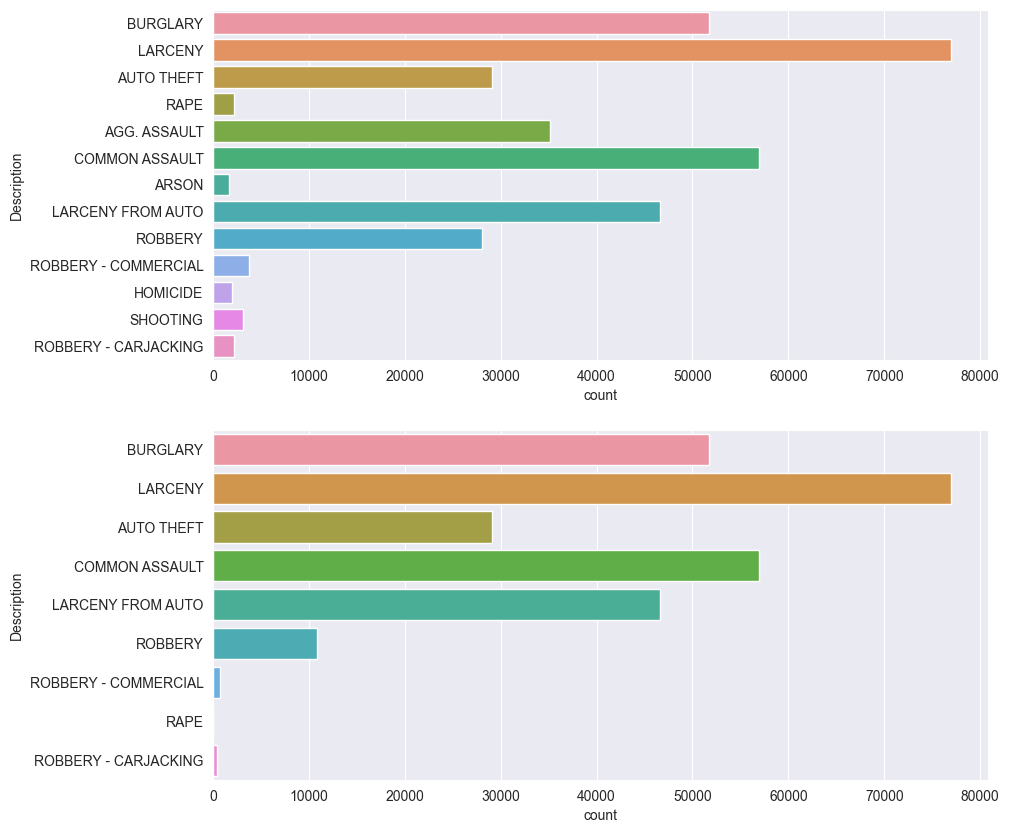

In [25]:
fig, ax = plt.subplots(2,1)
sns.countplot(y = df['Description'], ax = ax[0])
sns.countplot(y= df0['Description'], ax = ax[1])
fig.set_size_inches(10,10)
fig.show()

Perbandingan dua jenis kejahatan yang dilakukan dengan SENJATA dengan TANPA SENJATA, masuk akal untuk berasumsi bahwa nilai 0 untuk senjata berarti tidak ada senjata yang terlibat. Mari ganti 0 dengan "NO WEAPON".

In [26]:
df['Weapon'].fillna('NO WEAPON', inplace = True)

Cleaning CrimeDate and CrimeTime

In [27]:
df['CrimeTime'] = df['CrimeTime'].str.replace('24:00:00', '00:00:00')

df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
df['CrimeTime'] = pd.to_datetime(df['CrimeTime'], format='%H:%M:%S').dt.strftime('%H:%M:%S')

In [28]:
df['Date'] = df['CrimeDate'] + ' ' + df['CrimeTime']
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'].dt.year >= 2012]

In [29]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday + 1
df['Hour'] = df['Date'].dt.hour

In [30]:
df = df.drop(['CrimeDate', 'CrimeTime'], axis = 1)

In [31]:
df = df.set_index('Date')

Cleaning Inside/Outside

In [32]:
df['Inside_Outside'].value_counts()
df['Inside_Outside'] = df['Inside_Outside'].replace('I', 'Inside')
df['Inside_Outside'] = df['Inside_Outside'].replace('O', 'Outside')

### **Data Visualization**

Day of Month

[]

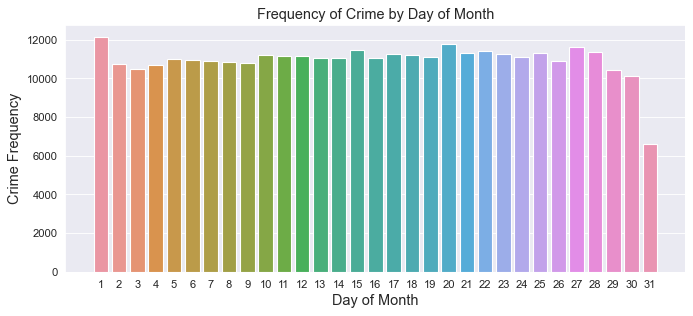

In [33]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by Day of Month', fontsize=13)
ax = sns.countplot(x = 'Day', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Month', fontsize=13)
plt.plot()

Month

[]

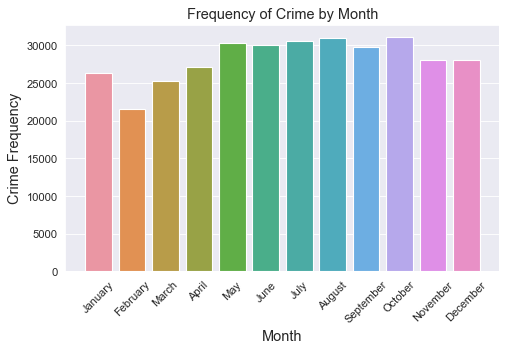

In [34]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Month', fontsize=13)
ax = sns.countplot(x = 'Month', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.xticks(rotation = 45)
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
ax.set_xticklabels(labels)
plt.plot()

Year

[]

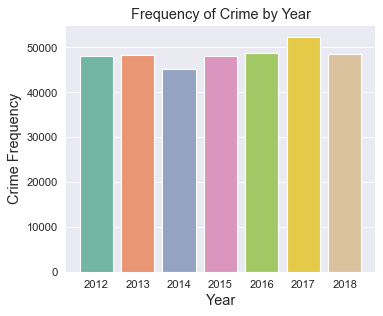

In [35]:
plt.figure(figsize=(5,4), dpi=80)

plt.title('Frequency of Crime by Year', fontsize=13)
ax = sns.countplot(x = 'Year', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.plot()

Weekday

[]

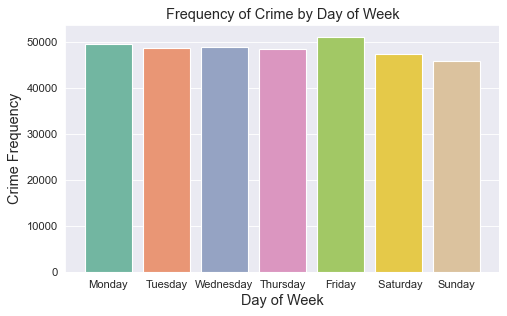

In [36]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=13)
ax = sns.countplot(x = 'Weekday', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Week', fontsize=13)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

Weekday and Description (messy)

[]

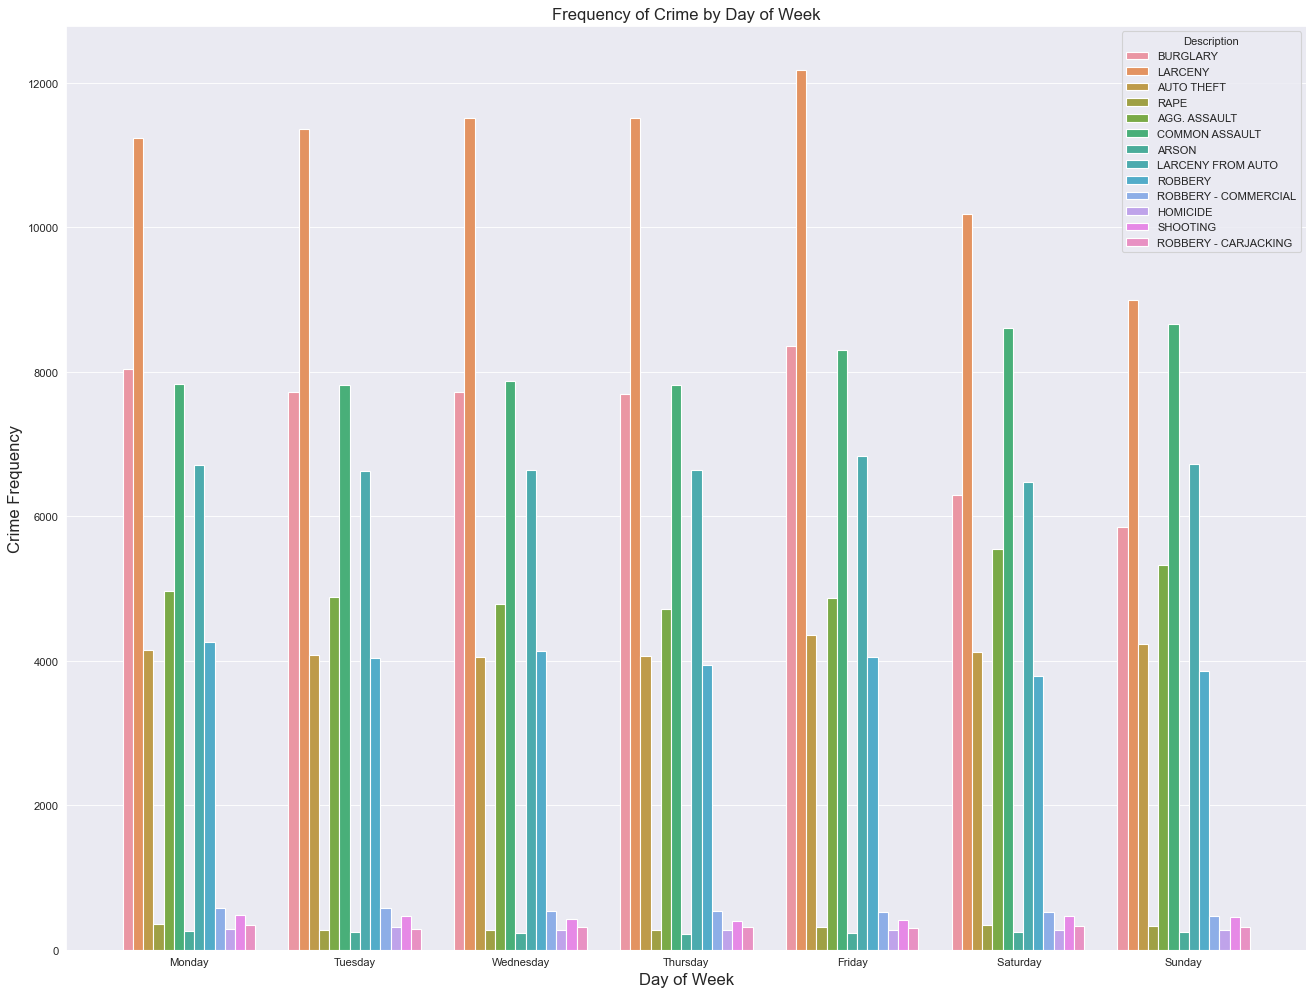

In [37]:
plt.figure(figsize=(20,15), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=15)
ax = sns.countplot(x = 'Weekday', hue = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

Hour of Day

[]

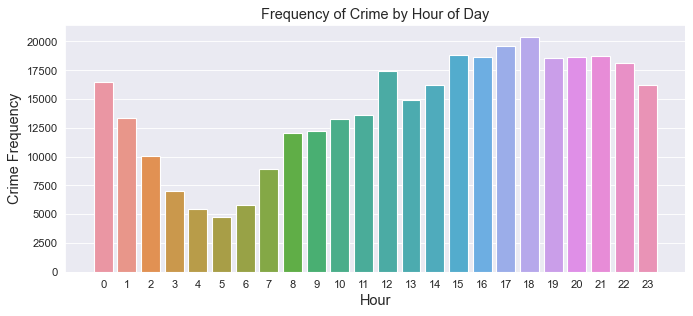

In [38]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by Hour of Day', fontsize=13)
ax = sns.countplot(x = 'Hour', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Hour', fontsize=13)
plt.plot()

Crime Description

[]

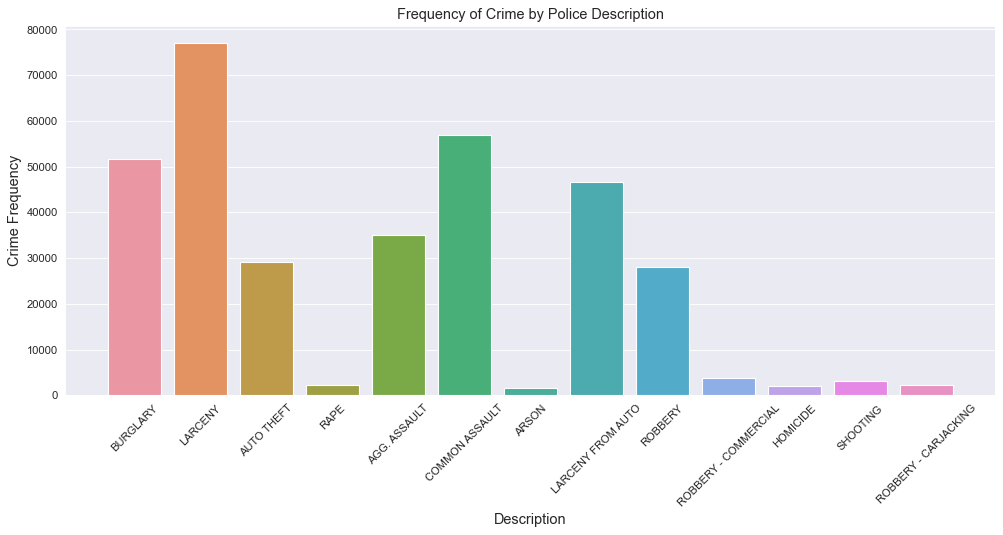

In [39]:
plt.figure(figsize=(15,6), dpi=80)

plt.title('Frequency of Crime by Police Description', fontsize=13)
ax = sns.countplot(x = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Description', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

Inside/Outside

[]

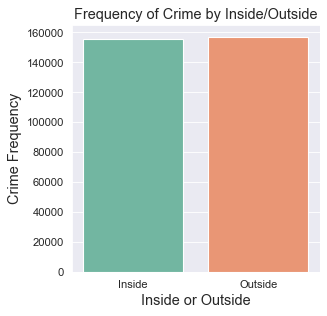

In [50]:
plt.figure(figsize=(4,4), dpi=80)

plt.title('Frequency of Crime by Inside/Outside', fontsize=13)
ax = sns.countplot(x = 'Inside_Outside', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Inside or Outside', fontsize=13)
plt.plot()

Weapon Used

[]

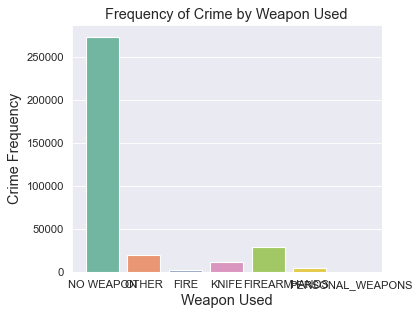

In [49]:
plt.figure(figsize=(5,4), dpi=80)

plt.title('Frequency of Crime by Weapon Used', fontsize=13)
ax = sns.countplot(x = 'Weapon', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Weapon Used', fontsize=13)
plt.plot()

Weapon and Year

[]

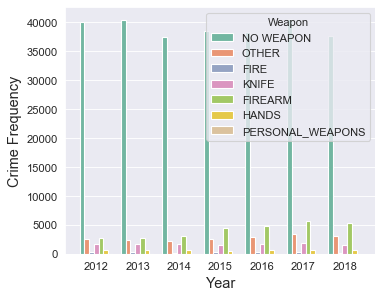

In [48]:
plt.figure(figsize = (5, 4), dpi = 80)

ax = sns.countplot(x = "Year", hue = "Weapon", data = df)
plt.ylabel("Frequency of Crime per Year Grouped by Weapon Used", fontsize = 13)
plt.ylabel("Crime Frequency", fontsize = 13)
plt.xlabel("Year", fontsize = 13)
plt.plot()

District

[]

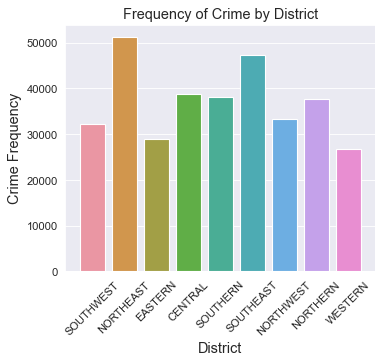

In [45]:
plt.figure(figsize=(5,4), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

District and Inside/Outside

[]

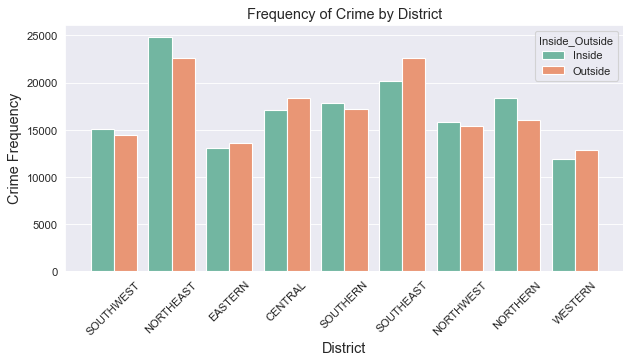

In [44]:
plt.figure(figsize=(9,4), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', hue = 'Inside_Outside', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()